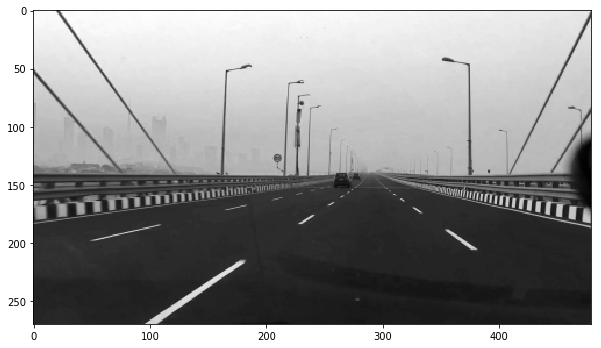

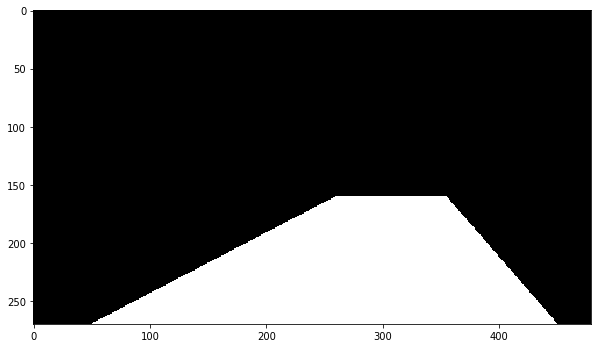

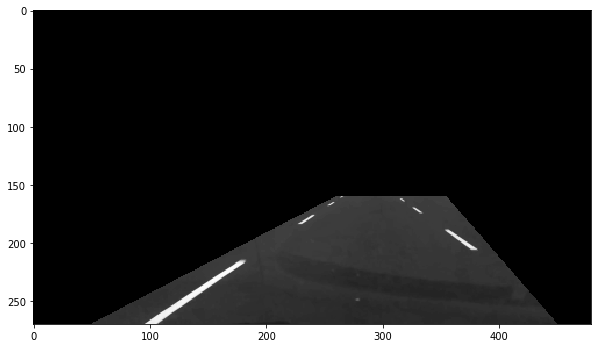

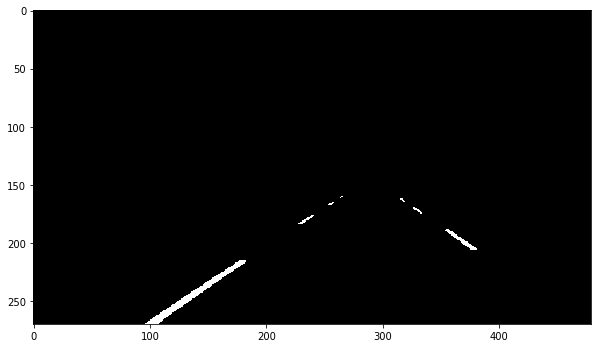

In [2]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

##https://www.youtube.com/watch?v=KWJaBJYJIjI&t=0s

col_frames = os.listdir('frames/')
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# load frames
col_images=[]
for i in tqdm_notebook(col_frames):
    img = cv2.imread('frames/'+i)
    col_images.append(img)
    
# specify frame index
idx = 457


plt.figure(figsize=(10,10))
plt.imshow(col_images[idx][:,:,0], cmap= "gray")
plt.show()
stencil = np.zeros_like(col_images[idx][:,:,0])
polygon = np.array([[50,270], [260,160], [355,160], [450,270]])

cv2.fillConvexPoly(stencil, polygon, 1)
plt.figure(figsize=(10,10))
plt.imshow(stencil, cmap= "gray")
plt.show()

img = cv2.bitwise_and(col_images[idx][:,:,0], col_images[idx][:,:,0], mask=stencil)

# plot masked frame
plt.figure(figsize=(10,10))
plt.imshow(img, cmap= "gray")
plt.show()

# apply image thresholding
ret, thresh = cv2.threshold(img, 90, 100, cv2.THRESH_BINARY)

plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap= "gray")
plt.show()
